In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("car_purchasing.csv", encoding="latin-1")

In [29]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [31]:
data.shape

(500, 9)

In [32]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [33]:
data[['age','annual Salary', 'credit card debt', 'net worth', 'car purchase amount']].corr()["car purchase amount"].sort_values(ascending=False)

car purchase amount    1.000000
age                    0.632865
annual Salary          0.617862
net worth              0.488580
credit card debt       0.028882
Name: car purchase amount, dtype: float64

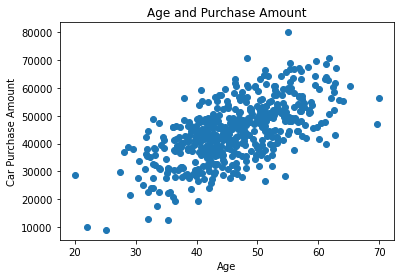

In [34]:
plt.scatter(data["age"], data["car purchase amount"])
plt.title("Age and Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Car Purchase Amount")
plt.show()

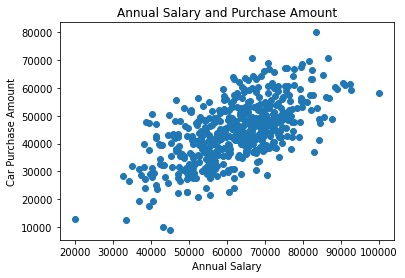

In [35]:
plt.scatter(data["annual Salary"], data["car purchase amount"])
plt.title("Annual Salary and Purchase Amount")
plt.xlabel("Annual Salary")
plt.ylabel("Car Purchase Amount")
plt.show()

In [36]:
data["Gender2"] = data["gender"].apply(lambda x: "Female" if x==1 else "Male")

In [37]:
data.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,Gender2
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,Male
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,Male
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,Female
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,Female
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,Female


In [38]:
data["Gender2"].value_counts()

Female    253
Male      247
Name: Gender2, dtype: int64

In [39]:
data.groupby("Gender2")["age"].mean()

Gender2
Female    45.733838
Male      46.761847
Name: age, dtype: float64

In [40]:
data.groupby("Gender2")["annual Salary"].mean()

Gender2
Female    61705.593322
Male      62559.128313
Name: annual Salary, dtype: float64

In [41]:
data.groupby("Gender2")["net worth"].mean()

Gender2
Female    430037.639104
Male      432948.721130
Name: net worth, dtype: float64

In [42]:
data["age"]

0      41.851720
1      40.870623
2      43.152897
3      58.271369
4      57.313749
         ...    
495    41.462515
496    37.642000
497    53.943497
498    59.160509
499    46.731152
Name: age, Length: 500, dtype: float64

In [43]:
def group_age(row):
    if row["age"] < 30:
        return "20-30"
    elif row["age"] < 40:
        return "30-40"
    elif row["age"] < 50:
        return "40-50"
    elif row["age"] < 60:
        return "50-60"
    else:
        return "60+"

In [44]:
data["Age Range"] = data.apply(group_age, axis=1)

In [45]:
data["Age Range"].value_counts()

40-50    231
50-60    142
30-40     96
60+       23
20-30      8
Name: Age Range, dtype: int64

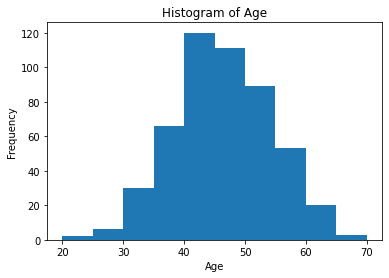

In [46]:
plt.hist(data["age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")
plt.show()

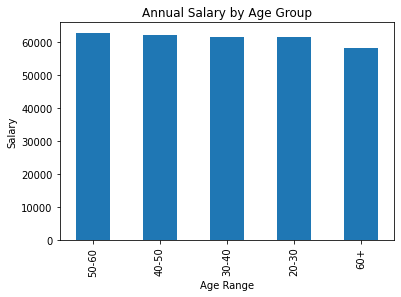

In [47]:
data.groupby("Age Range")["annual Salary"].mean().sort_values(ascending=False).plot.bar()
plt.title("Annual Salary by Age Group")
plt.xlabel("Age Range")
plt.ylabel("Salary")
plt.show()

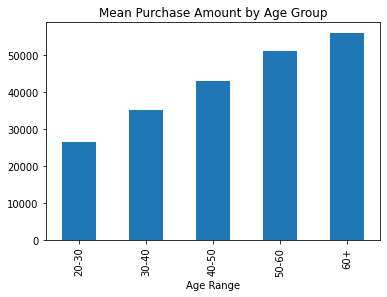

In [48]:
data.groupby("Age Range")["car purchase amount"].mean().plot(kind="bar")
plt.title("Mean Purchase Amount by Age Group")
plt.show()

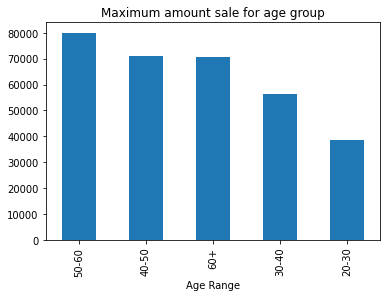

In [50]:
data.groupby("Age Range")["car purchase amount"].max().sort_values(ascending=False).plot(kind="bar")
plt.title("Maximum amount sale for age group")
plt.show()

In [49]:
data.groupby(["Age Range", "Gender2"])["car purchase amount"].mean()

Age Range  Gender2
20-30      Female     27417.853146
           Male       25277.462433
30-40      Female     34698.012126
           Male       36033.521977
40-50      Female     42136.093969
           Male       44183.213731
50-60      Female     52224.305711
           Male       50086.066111
60+        Female     59429.713077
           Male       53534.350440
Name: car purchase amount, dtype: float64

In [51]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth', 'car purchase amount',
       'Gender2', 'Age Range'],
      dtype='object')

In [52]:
X = data[["age", "annual Salary", "credit card debt", "net worth"]]
y = data[["car purchase amount"]]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
len(X_train)

400

In [56]:
len(X_test)

100

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [63]:
X_train

array([[ 1.93314819, -0.93864712,  0.78638878, -2.18502396],
       [ 2.43138538,  0.75430521, -1.27510159, -0.87116662],
       [-1.76571207,  1.00069491,  0.47555781, -0.77640571],
       ...,
       [ 0.16709208, -0.31955488, -1.3797423 ,  0.42647885],
       [-0.08406189, -0.86788376,  1.19486429, -2.03408088],
       [-0.03907113,  0.06541686,  1.89083134,  0.35309613]])

In [60]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [62]:
X_test = scaler.transform(X_test)

c:\Users\alche\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test, predictions)))
    print("Root mean squared error on model is {}".format(mean_squared_error(y_test, predictions)))